In [ ]:
import re
import pandas as pd
from tqdm import tqdm
import wordninja
tqdm.pandas()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [140]:
df = pd.read_csv('Urgency Prediction April.csv',header = None)
df.head()

,0
0,receive letter date from bank advise me t...
1,be try to apply for loan to purchase jet sk...
2,ex peri an and be report incorrectly late pa...
3,open an acc in my name have attempt to get ...
4,cant understand how this be happen to me hav...


In [141]:
from monkeylearn import MonkeyLearn
tag = []
ml = MonkeyLearn('7ff205348bb68f29f60c911000f09a6dd418213f')
for i in tqdm(range(len(df))):
    data = [df[0][i]]
    model_id = 'cl_Aiu8dfYF'
    result = ml.classifiers.classify(model_id, data)
    #print(i)
    tag.append(result.body[0]['classifications'][0]['tag_name'])
    #print(result.body)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:56<00:00,  2.98s/it]


In [142]:
tag

['Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Urgent',
 'Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent',
 'Not Urgent']

In [1]:
import pandas as pd
import re

In [3]:
df = pd.read_csv('C:/Users/samarth152721/Desktop/Urgency April Prediction Final.csv')
df.head()

,Consumer complaint narrative,Urgency,Model Prediction,Clean Data,Threshold,True Label
0,I am a Macys cardholder since XXXX. I went to ...,NotUrgent,0.048910,be macy card holder since go to store to ...,0,0
1,URGENT. APPLYING FOR HOME LOAN. CREDIT SCORE I...,NotUrgent,0.301581,urgent apply for home loan credit score impact...,0,0
2,"MY NAME IS XXXX XXXX, I HAVE BEEN DOING BUSINE...",NotUrgent,0.055524,my name be have be do business with for...,0,0
3,This company has sent no validation/ contract ...,NotUrgent,0.043886,this company have send no validation contract ...,0,0
4,Wells Fargo Bank has opened unauthorized check...,NotUrgent,0.000083,well fargo bank have open unauthorized check a...,0,0


In [151]:
def clean(text):
    text = re.sub('[^a-zA-Z]','',text)
    return text

In [153]:
df['Urgency'] = df['Urgency'].apply(clean)

In [154]:
df.to_csv('Urgency April Prediction.csv',index = False)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
tqdm.pandas()
import pickle

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv('C:/Users/samarth152721/Desktop/POC/Final Training Data/Urgency April Prediction Final.csv')
df.head()

,Consumer complaint narrative,Urgency,Model Prediction,Clean Data,True Label,Threshold,Threshold 0.56
0,I am a Macys cardholder since XXXX. I went to ...,NotUrgent,0.048910,be macy card holder since go to store to ...,0,0,0
1,URGENT. APPLYING FOR HOME LOAN. CREDIT SCORE I...,NotUrgent,0.301581,urgent apply for home loan credit score impact...,0,0,0
2,"MY NAME IS XXXX XXXX, I HAVE BEEN DOING BUSINE...",NotUrgent,0.055524,my name be have be do business with for...,0,0,0
3,This company has sent no validation/ contract ...,NotUrgent,0.043886,this company have send no validation contract ...,0,0,0
4,Wells Fargo Bank has opened unauthorized check...,NotUrgent,0.000083,well fargo bank have open unauthorized check a...,0,0,0


In [4]:
urgency_model = load_model('C:/Users/samarth152721/Desktop/POC/Final models/model_word2vec_more_more_urgent_clean.h5')
urgency_tokenizer = Tokenizer()
with open('C:/Users/samarth152721/Desktop/POC/Final models/tokenizer_word2vec_more_more_urgent.pickle', 'rb') as handle:
    urgency_tokenizer = pickle.load(handle)

In [48]:
def urgency_prediction(text):
    #text = urgency_cleaning(text)
    b = urgency_tokenizer.texts_to_sequences([text])
    b_pad = pad_sequences(b,maxlen = 500,padding='post',truncating='pre')
    results = urgency_model.predict(b_pad)
    return results[0][0]
    
df['New Prediction'] = df['Clean Data'].progress_apply(urgency_prediction)

100%|████████████████████████████████████████████████████████████████████████████████| 660/660 [01:29<00:00,  7.37it/s]


In [ ]:
urgency_prediction('This is a ')

In [13]:
df.head(10)

,Consumer complaint narrative,Urgency,Model Prediction,Clean Data,True Label,Threshold,Threshold 0.56,New Encoding
0,I am a Macys cardholder since XXXX. I went to ...,NotUrgent,0.048910,be macy card holder since go to store to ...,0,0,0,0
1,URGENT. APPLYING FOR HOME LOAN. CREDIT SCORE I...,NotUrgent,0.301581,urgent apply for home loan credit score impact...,0,0,0,1
2,"MY NAME IS XXXX XXXX, I HAVE BEEN DOING BUSINE...",NotUrgent,0.055524,my name be have be do business with for...,0,0,0,0
3,This company has sent no validation/ contract ...,NotUrgent,0.043886,this company have send no validation contract ...,0,0,0,0
4,Wells Fargo Bank has opened unauthorized check...,NotUrgent,0.000083,well fargo bank have open unauthorized check a...,0,0,0,0
5,ftc violations,NotUrgent,0.270713,ft violations,0,0,0,0
6,Dear Sir/Madam : I have repeatedly reached out...,Urgent,0.288307,dear sir madam have repeatedly reach out to t...,1,0,0,0
7,I signed up for TransUnion so I could get my f...,NotUrgent,0.001989,sign up for trans union so could get my free...,0,0,0,0
8,On XX/XX/XXXX I began getting emails from Barc...,Urgent,0.299799,on begin get email from barclays indicate th...,1,0,0,0
9,The Credit reports from the three predominant ...,NotUrgent,0.009600,the credit report from the three predominant c...,0,0,0,0


In [5]:
def encoding(text):
    if text>0.117:
        return 1
    else:
        return 0

In [6]:
df['New Encoding'] = df['Model Prediction'].apply(encoding)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
import numpy as np

In [8]:
y_test = df['True Label'].values
predictions = df['Model Prediction'].values

In [9]:
print(classification_report(y_test,df['New Encoding']))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       607
           1       0.34      0.92      0.50        53

    accuracy                           0.85       660
   macro avg       0.67      0.88      0.71       660
weighted avg       0.94      0.85      0.88       660



In [10]:
recall = []
for thresh in np.arange(0,0.9,0.01):
    thresh = np.round(thresh,2)
    print('Recall Score at threshold {0} is {1}'.format(thresh,recall_score(y_test,(predictions>thresh).astype(int))))
    recall.append(recall_score(y_test,(predictions>thresh).astype(int)))

Recall Score at threshold 0.0 is 1.0
Recall Score at threshold 0.01 is 1.0
Recall Score at threshold 0.02 is 1.0
Recall Score at threshold 0.03 is 0.9811320754716981
Recall Score at threshold 0.04 is 0.9622641509433962
Recall Score at threshold 0.05 is 0.9622641509433962
Recall Score at threshold 0.06 is 0.9245283018867925
Recall Score at threshold 0.07 is 0.9245283018867925
Recall Score at threshold 0.08 is 0.9245283018867925
Recall Score at threshold 0.09 is 0.9245283018867925
Recall Score at threshold 0.1 is 0.9245283018867925
Recall Score at threshold 0.11 is 0.9245283018867925
Recall Score at threshold 0.12 is 0.9056603773584906
Recall Score at threshold 0.13 is 0.8867924528301887
Recall Score at threshold 0.14 is 0.8867924528301887
Recall Score at threshold 0.15 is 0.8867924528301887
Recall Score at threshold 0.16 is 0.8679245283018868
Recall Score at threshold 0.17 is 0.8490566037735849
Recall Score at threshold 0.18 is 0.8490566037735849
Recall Score at threshold 0.19 is 0.8301

In [11]:
precision = []
for thresh in np.arange(0,0.9,0.01):
    thresh = np.round(thresh,2)
    print('Precision Score at threshold {0} is {1}'.format(thresh,precision_score(y_test,(predictions>thresh).astype(int))))
    precision.append(precision_score(y_test,(predictions>thresh).astype(int)))

Precision Score at threshold 0.0 is 0.0803030303030303
Precision Score at threshold 0.01 is 0.17096774193548386
Precision Score at threshold 0.02 is 0.20306513409961685
Precision Score at threshold 0.03 is 0.22807017543859648
Precision Score at threshold 0.04 is 0.23943661971830985
Precision Score at threshold 0.05 is 0.2602040816326531
Precision Score at threshold 0.06 is 0.26063829787234044
Precision Score at threshold 0.07 is 0.2784090909090909
Precision Score at threshold 0.08 is 0.2916666666666667
Precision Score at threshold 0.09 is 0.3081761006289308
Precision Score at threshold 0.1 is 0.3161290322580645
Precision Score at threshold 0.11 is 0.3310810810810811
Precision Score at threshold 0.12 is 0.3404255319148936
Precision Score at threshold 0.13 is 0.3560606060606061
Precision Score at threshold 0.14 is 0.36153846153846153
Precision Score at threshold 0.15 is 0.3643410852713178
Precision Score at threshold 0.16 is 0.36220472440944884
Precision Score at threshold 0.17 is 0.375


In [12]:
f1 = []
for thresh in np.arange(0,0.9,0.01):
    thresh = np.round(thresh,2)
    print('F1 Score at threshold {0} is {1}'.format(thresh,f1_score(y_test,(predictions>thresh).astype(int))))
    f1.append(f1_score(y_test,(predictions>thresh).astype(int)))

F1 Score at threshold 0.0 is 0.14866760168302945
F1 Score at threshold 0.01 is 0.29201101928374656
F1 Score at threshold 0.02 is 0.3375796178343949
F1 Score at threshold 0.03 is 0.3701067615658363
F1 Score at threshold 0.04 is 0.3834586466165414
F1 Score at threshold 0.05 is 0.4096385542168675
F1 Score at threshold 0.06 is 0.4066390041493776
F1 Score at threshold 0.07 is 0.4279475982532751
F1 Score at threshold 0.08 is 0.4434389140271493
F1 Score at threshold 0.09 is 0.4622641509433963
F1 Score at threshold 0.1 is 0.4711538461538461
F1 Score at threshold 0.11 is 0.4875621890547263
F1 Score at threshold 0.12 is 0.4948453608247423
F1 Score at threshold 0.13 is 0.5081081081081082
F1 Score at threshold 0.14 is 0.5136612021857924
F1 Score at threshold 0.15 is 0.5164835164835164
F1 Score at threshold 0.16 is 0.5111111111111112
F1 Score at threshold 0.17 is 0.5202312138728323
F1 Score at threshold 0.18 is 0.5202312138728323
F1 Score at threshold 0.19 is 0.5207100591715977
F1 Score at threshol

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

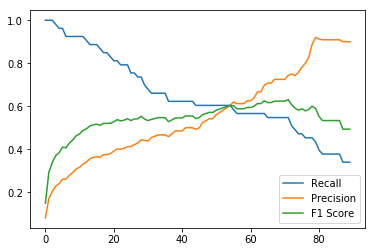

In [14]:
x_axis = range(len(f1))
plt.plot(x_axis,recall,label = 'Recall')
plt.plot(x_axis,precision,label = 'Precision')
plt.plot(x_axis,f1,label = 'F1 Score')
plt.legend()

plt.show()

In [15]:
import numpy as np
from sklearn.metrics import roc_curve

In [16]:
y_test = df['True Label'].values
y_score = df['Model Prediction'].values

In [17]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, df['Model Prediction'].ravel())

In [18]:
from sklearn.metrics import auc,roc_auc_score
auc_keras = auc(fpr_keras, tpr_keras)

In [20]:
auc_keras

0.9449970470299338

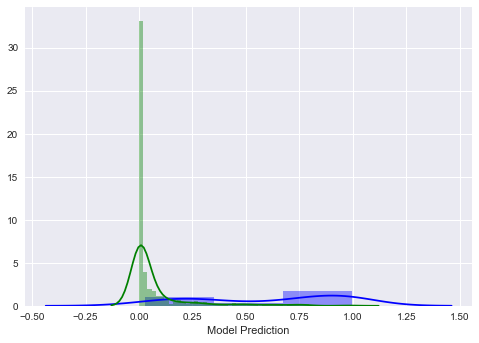

In [21]:
import seaborn as sns

sns.distplot( df[df['True Label'] == 1]["Model Prediction"], color = 'b' )
sns.distplot( df[df['True Label'] == 0]["Model Prediction"], color = 'g' )

In [25]:
gmeans = np.sqrt(tpr_keras * (1-fpr_keras))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_keras[ix], gmeans[ix]))

Best Threshold=0.117820, G-Mean=0.884


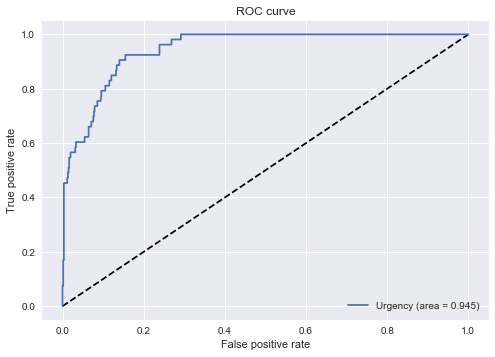

In [53]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Urgency (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [77]:
diff_TPRFPR=tpr_keras-fpr_keras
KS=max(diff_TPRFPR)
KS

0.7696683348357216

In [36]:
ks = []
for i in range(len(tpr_keras)):
    ks.append(tpr_keras[i]-fpr_keras[i])
thresholds_keras[np.argmax(ks)]

0.117819622

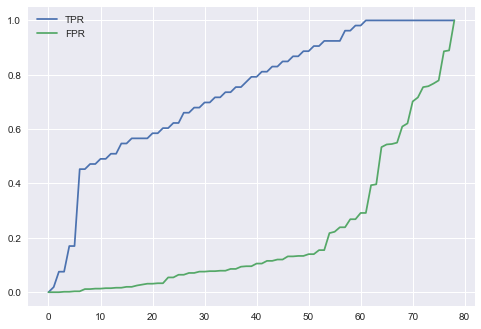

In [56]:
plt.plot(range(len(tpr_keras)),tpr_keras,label = 'TPR')
plt.plot(range(len(fpr_keras)),fpr_keras,label = 'FPR')
#plt.axvline(x=(thresholds_keras[np.argmax(ks)])*100)
plt.legend()
plt.show()

In [58]:
def encoding(text):
    if text>0.5:
        return 1
    else:
        return 0
df['Prediction Encoded'] = df['Model Prediction'].apply(encoding)

In [59]:
print(confusion_matrix(df['True Label'],df['Prediction Encoded']))

[[582  25]
 [ 21  32]]


In [60]:
print(classification_report(df['True Label'],df['Prediction Encoded']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       607
           1       0.56      0.60      0.58        53

    accuracy                           0.93       660
   macro avg       0.76      0.78      0.77       660
weighted avg       0.93      0.93      0.93       660



In [54]:
def encoding(text):
    if text>0.117:
        return 1
    else:
        return 0
df['Prediction Encoded'] = df['Model Prediction'].apply(encoding)

print(classification_report(df['True Label'],df['Prediction Encoded']))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       607
           1       0.34      0.92      0.50        53

    accuracy                           0.85       660
   macro avg       0.67      0.88      0.71       660
weighted avg       0.94      0.85      0.88       660



In [55]:
J = tpr_keras - fpr_keras
ix = np.argmax(J)
best_thresh = thresholds_keras[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.117820
